# Projeto final - O que os naufrágios na Europa antiga e medieval nos dizem sobre sua história

NOME: LORENZO FRÖHLICH FILIPPIN  
N° USP: 13726960  
EMAIL: LORENZO_FILIPPIN@USP.BR

Apesar de estudar Economia, um assunto que eu gosto muito é história antiga e medieval. Procurando na Newsletter 
"Data is Plural",
encontrei uma edição com bases de dados relacionados à época na região do Mediterrâneo. Uma dessas bases é a analisada aqui: naufrágios e suas informações geográficas.

Ela pode ser acessada no *Digital Atlas of Roman and Medieval Civilizations*, em https://darmc.harvard.edu/data-availability

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Lendo o arquivo 

data = pd.read_csv('geodatabase_of_shipwrecks.csv')
data

,Unnamed: 0,DARMC_X,DARMC_Y,DARMC_OBJECTID,NAME,NAME2,Latitude,Longitude,Geo_Q,F2008_Wreck,...,OXREP_Reference,OXREP_Comments,OXREP_Stone_cargo_notes,OXREP_Other_cargo,OXREP_Hull_remains,OXREP_Shipboard_paraphernalia,OXREP_Ship_equipment,OXREP_Estimated_tonnage,Unnamed: 61,Unnamed: 62
0,33.0,-3.162587e+05,6959356.392,34,Ellesmere,,52.872000,-2.841,ca,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,912.0,1.805231e+06,5322124.705,913,Krava,,43.066667,16.216667,,416.0,...,N. Cambi in Amphores Romains et Histoire Econo...,The earliest known wreck in the Adriatic,NaN,Grindstones and handmills,NaN,NaN,NaN,NaN,NaN,NaN
2,738.0,1.421179e+06,4602997.051,739,San Vito,,38.166667,12.766667,,809.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Agde 3,NaN,43.267000,3.45,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1164.0,3.595620e+06,4148037.891,1165,Ayios Georghios,,34.883333,32.3,,53.0,...,"C. Giangrande et al, RDAC (1987), 192; Parker...","Rhodian amphorae, 3rd c. BC? (seen by AIW)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,NaN,NaN,NaN,NaN,Yenikapi 9,NaN,41.004470,28.95249,NaN,NaN,...,"U. Kocabas (ed.), The Old ships of the New Gat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1932,NaN,NaN,NaN,NaN,NaN,Dragonera 3,39.567000,2.35,?,277.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1933,NaN,NaN,NaN,NaN,Sjøvallen-skipet,NaN,59.823444,10.542,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Apagar colunas sem dados ou com dados inconsistentes
data = data.drop(columns=['Unnamed: 0','Geo_D','Unnamed: 61','Unnamed: 62'])

# Apagar linhas sem nome
data = data[((data['NAME'].notna() == True) | (data['NAME2'].notna() == True))]

data

,DARMC_X,DARMC_Y,DARMC_OBJECTID,NAME,NAME2,Latitude,Longitude,Geo_Q,F2008_Wreck,F2010_Wreck,...,OXREP_Depth,OXREP_Period,OXREP_Reference,OXREP_Comments,OXREP_Stone_cargo_notes,OXREP_Other_cargo,OXREP_Hull_remains,OXREP_Shipboard_paraphernalia,OXREP_Ship_equipment,OXREP_Estimated_tonnage
0,-3.162587e+05,6959356.392,34,Ellesmere,,52.872000,-2.841,ca,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.805231e+06,5322124.705,913,Krava,,43.066667,16.216667,,416.0,430.0,...,NaN,Classical/Hellenistic,N. Cambi in Amphores Romains et Histoire Econo...,The earliest known wreck in the Adriatic,NaN,Grindstones and handmills,NaN,NaN,NaN,NaN
2,1.421179e+06,4602997.051,739,San Vito,,38.166667,12.766667,,809.0,847.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Agde 3,NaN,43.267000,3.45,NaN,5.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.595620e+06,4148037.891,1165,Ayios Georghios,,34.883333,32.3,,53.0,56.0,...,Shallow,Hellenistic,"C. Giangrande et al, RDAC (1987), 192; Parker...","Rhodian amphorae, 3rd c. BC? (seen by AIW)",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,NaN,NaN,NaN,Yenikapi 7,NaN,41.004470,28.95249,NaN,NaN,NaN,...,NaN,Byzantine,"U. Kocabas (ed.), The Old ships of the New Gat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930,NaN,NaN,NaN,Yenikapi 8,NaN,41.004470,28.95249,NaN,NaN,NaN,...,NaN,Byzantine,"U. Kocabas (ed.), The Old ships of the New Gat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1931,NaN,NaN,NaN,Yenikapi 9,NaN,41.004470,28.95249,NaN,NaN,NaN,...,NaN,Byzantine,"U. Kocabas (ed.), The Old ships of the New Gat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1932,NaN,NaN,NaN,NaN,Dragonera 3,39.567000,2.35,?,277.0,286.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(f'Foram registradas {len(data.columns)} informações de {len(data)} naufrágios!')

Foram registradas 59 informações de 1934 naufrágios!


In [5]:
# Vendo todas as 59 colunas
data.columns

# Isso facilitará a filtragem de dados

Index(['DARMC_X', 'DARMC_Y', 'DARMC_OBJECTID', 'NAME', 'NAME2', 'Latitude',
       'Longitude', 'Geo_Q', 'F2008_Wreck', 'F2010_Wreck', 'Start_Date',
       'End_Date', 'Date_Q', 'Date_D', 'Depth', 'Depth_Q', 'Year_Found',
       'Year_Found_1', 'Cargo_1', 'Cargo_Type1', 'Cargo_2', 'Cargo_Type2',
       'Cargo_3', 'Cargo_Type_3', 'Other_Cargo', 'Gear',
       'Estimated displacement', 'Comments', 'Length', 'Width', 'Size_Detail',
       'Parker_ref', 'Parker?', 'Bibliography AFM State 2008',
       'Bibliography_2', 'OXREP_locid', 'OXREP_Site_Name', 'OXREP_Wreck_Name',
       'OXREP_Earliest_Date', 'OXREP_Latest_Date', 'OXREP_Dating_comment',
       'OXREP_Wreck_ID', 'OXREP_Strauss_ID', 'OXREP_Parker_Number',
       'OXREP_Sea_area', 'OXREP_Country', 'OXREP_Region', 'OXREP_Min_depth',
       'OXREP_Max_depth', 'OXREP_Depth', 'OXREP_Period', 'OXREP_Reference',
       'OXREP_Comments', 'OXREP_Stone_cargo_notes', 'OXREP_Other_cargo',
       'OXREP_Hull_remains', 'OXREP_Shipboard_parapherna

Até agora, as linhas/colunas apagadas eram de dados inexistentes ou inconsistentes. A partir daí, os dados apagados são os que não serão necessários à nossa análise, como os dados da Oxford (repetidos em relação aos de Harvard, que também está mais completa), metadados (referências à própria base de dados), e alguns dados específicos sobre cargas a bordo.

In [6]:
# Trabalhar apenas com os dados de harvard
data = data[data.columns.drop(list(data.filter(regex='OXREP')))]

# Apagar colunas sobre metadados
data = data.drop(columns=['Geo_Q','F2008_Wreck','F2010_Wreck','Comments','Parker_ref','Parker?','Date_Q','Date_D','Year_Found_1',
                        'Depth_Q','Bibliography_2','Size_Detail','Bibliography AFM State 2008'])
data = data[data.columns.drop(list(data.filter(regex='DARMC')))]

# Excluindo dados específicos sobre cargas a bordo
data = data[data.columns.drop(list(data.filter(regex='_Type')))]
data = data.drop(columns=['Cargo_3','Other_Cargo'])

In [7]:
data.columns

### Assim, sobraram as seguintes colunas: ###

Index(['NAME', 'NAME2', 'Latitude', 'Longitude', 'Start_Date', 'End_Date',
       'Depth', 'Year_Found', 'Cargo_1', 'Cargo_2', 'Gear',
       'Estimated displacement', 'Length', 'Width'],
      dtype='object')

In [8]:
# Renomear as colunas deve facilitar nossa análise: 

data = data.rename(columns={'NAME':'NOME',
                            'NAME2':'NOME2',
                            'Start_Date':'Data_início',
                            'End_Date':'Data_final',
                            'Depth':'Profundidade',
                            'Year_Found':'Ano_achado',
                            'Cargo_1':'Carga1',
                            'Cargo_2':'Carga2',
                            'Gear':'Equipamento',
                            'Estimated displacement':'Peso',
                            'Length':'Comprimento',
                            'Width':'Largura',
})

# Colunas com os nomes atualizados:
data.columns

Index(['NOME', 'NOME2', 'Latitude', 'Longitude', 'Data_início', 'Data_final',
       'Profundidade', 'Ano_achado', 'Carga1', 'Carga2', 'Equipamento', 'Peso',
       'Comprimento', 'Largura'],
      dtype='object')

Com a filtragem correta dos dados, temos uma tabela quase pronta para analisar algumas informações relevantes. Falta, ainda, fazer uma limpeza, visto que há varios valores com valores nulos ou espaços em brancos (strings como essa: ' ').

Será mais fácil trabalhar com valores nulos (NaN) por conta da função .dropna(), portanto, melhor transformar os espaços vazios em nulos.

In [9]:
# Substituindo espaços vazios por valores nulos:
data = data.replace(' ', np.nan)


Agora, sim, temos nossos dados filtados e limpos, prontos para serem usados na nossa análise. Segue a tabela e, abaixo, uma descrição de cada coluna:

In [10]:
data

,NOME,NOME2,Latitude,Longitude,Data_início,Data_final,Profundidade,Ano_achado,Carga1,Carga2,Equipamento,Peso,Comprimento,Largura
0,Ellesmere,NaN,52.872000,-2.841,-500,500.0,NaN,1864,NaN,NaN,Paddle & bowl found with the boat.,0.412,3.35,0.73
1,Krava,NaN,43.066667,16.216667,-400,-200.0,NaN,NaN,amphoras,NaN,NaN,NaN,0,0
2,San Vito,NaN,38.166667,12.766667,-400,500.0,NaN,NaN,amphoras,NaN,NaN,NaN,0,0
3,Agde 3,NaN,43.267000,3.45,-300,500.0,8,NaN,Amphoras,NaN,NaN,NaN,NaN,NaN
4,Ayios Georghios,NaN,34.883333,32.3,-300,-200.0,NaN,NaN,amphoras,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,Yenikapi 7,NaN,41.004470,28.95249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930,Yenikapi 8,NaN,41.004470,28.95249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1931,Yenikapi 9,NaN,41.004470,28.95249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1932,NaN,Dragonera 3,39.567000,2.35,NaN,NaN,4,NaN,Amphoras,NaN,NaN,NaN,NaN,NaN


Descrição das Colunas:

**NOME**: Nome da embarcação naufragada <br />
**NOME2**: Nome adicional da embarcação naufragada (nomes diferentes por catalogação) <br />
**Latitude**: Localização geográfica latitudinal do naufrágio <br />
**Longitude**: Localização geográfica longitudinal do naufrágio <br />
**Data_início**: Estimativa da data mais prévia de quando o naufrágio deve ter ocorrido <br />
**Data_final**: Estimativa da data mais tardar de quando o naufrágio deve ter ocorrido <br />
**Profundidade**: Profundidade no qual a embarcação naufragada foi encontrada <br />
**Ano_achado**: Ano no qual a embarcação naufragada foi encontrada <br />
**Carga1**: Principal carga que a embarcação levava <br />
**Carga2**: Carga secundária que a embarcação levava <br />
**Equipamento**: Objetos encontrados da embarcação que não são carga <br />
**Peso**: Peso estimado da embarcação naufragada <br />
**Comprimento**: Comprimento do casco da embarcação <br />
**Largura**: Largura do casco da embarcação <br />

A primeira análise será em relação as datas estimadas de quando o naufrágio ocorreu. Veja os gráficos:

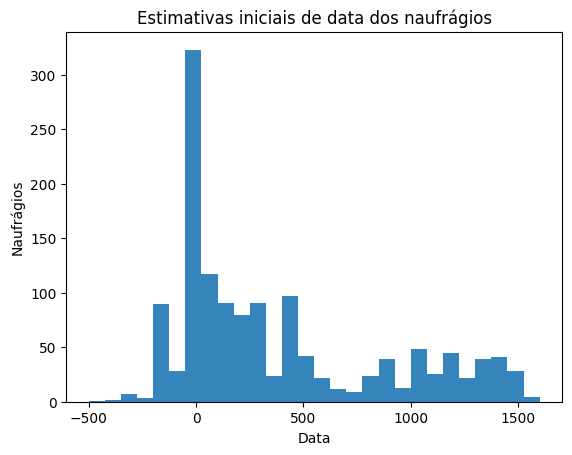

In [11]:
# Histograma com as estimativas de datas iniciais de naufrágios
data['Data_início'] = data['Data_início'].dropna().astype(int)
plt.hist(data['Data_início'], bins=range(int(min(data['Data_início'])), int(max(data['Data_início'])) + 10, 75),alpha=0.9)
plt.title('Estimativas iniciais de data dos naufrágios')
plt.xlabel('Data')
plt.ylabel('Naufrágios')
plt.show()

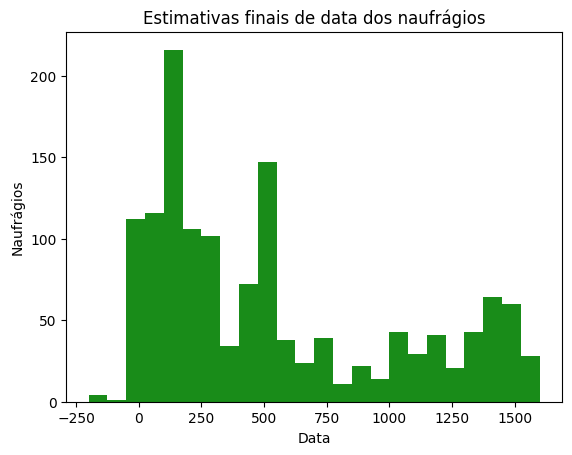

In [12]:
# Histograma com as estimativas de datas mais tardis de naufrágios
data['Data_final'] = data['Data_final'].dropna().astype(int)
plt.hist(data['Data_final'], bins=range(int(min(data['Data_final'])), int(max(data['Data_final'])) + 10, 75), color='green',alpha=0.9)
plt.title('Estimativas finais de data dos naufrágios')
plt.xlabel('Data')
plt.ylabel('Naufrágios')
plt.show()

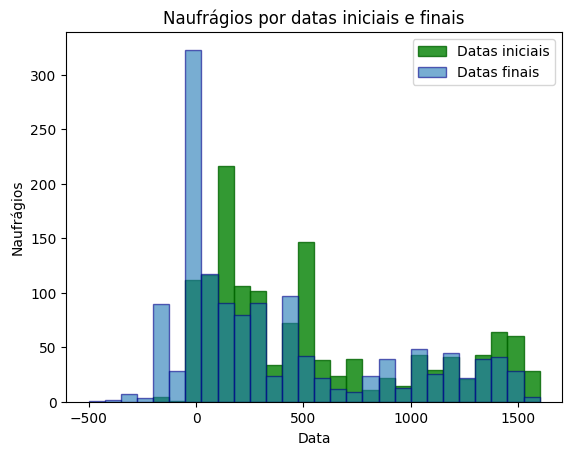

A correlação das datas iniciais e finais é alta, de 0.8944561208765313


In [13]:
# Juntos:
plt.hist(data['Data_final'], bins=range(int(min(data['Data_final'])), int(max(data['Data_final'])) + 10, 75), color='green', alpha=0.8, edgecolor='darkgreen',label='Datas iniciais')
plt.hist(data['Data_início'], bins=range(int(min(data['Data_início'])), int(max(data['Data_início'])) + 10, 75), alpha=0.6, edgecolor='darkblue',label='Datas finais')
plt.title('Naufrágios por datas iniciais e finais')
plt.xlabel('Data')
plt.ylabel('Naufrágios')
plt.legend()
plt.show()

print(f"A correlação das datas iniciais e finais é alta, de {(data['Data_início'].dropna().astype(int)).corr(data['Data_final'].dropna().astype(int))}")

Primeiro, é importante assumir que a quantidade de naufrágios é proporcional à quantidade de navios em circulação, quando analisadas em menores ou mais específicos períodos de tempo, para isolar outas variáveis como o efeito da tecnologia.

Essa tabela cojunta mostra de forma clara uma tendência: aumento de naufrágios estimados a partir de 300 a.C, auge em 0 e queda ao se aproximar de 500 d.C, mantendo uma quantidade relativamente baixa por um longo período depois, aumentando fracamente de volta entre 1000 e 1500.

Até mais ou menos o ano 1000, como a tecnologia das embarcações pouco mudou (ao menos a ponto de reduzir os naufrágios em grande quantidade), certamente a maior quantidade de naufrágios encontrados tem a ver com uma maior quantidade de embarcações em circulação no período - e vice-versa.

Faz todo sentido! O Império Romano, um dos maiores que já existiram no planeta, surge por volta de 500 a.C., mas em 300 a.C. que o Império começa a crescer, anexando províncias fora da península itálica, justamente onde há o primeiro 'boom' de supostas datas de naufrágios (1a alta do 1° gráfico), pois utilizavam de barcos como um dos principais meios de transporte. O império também atinge seu auge no ano 117 d.C. (próximo à data com a maior quantidade de datas tardias para naufrágios - 2° gráfico) e a queda do Império Romano do Ocidente se dá em 476 d.C, próximo o suficiente do ano 500, quando há a queda.

Conlcusão: a quantidade de naufrágios nesse período mostra que a circulação marítima no período está intimidamente ligada ao Império Romano, sua expansão e sua decadência.

Mas por que a quantidade de naufrágios não cresceu novamente? 3 momentos históricos explicam isso: 
Primeiro, logo após a queda do Império, com as invasões "bárbaras" nos litorais houve maior interiorização da Europa, e portanto, menor concentração de pessoas no litoral;  <br />
A divisão ocidente/oriente aumentou (vide Império Romano do Oriente) e por isso, o comércio entre os impérios e reinos se esmoreceu;  <br />
E posteriormente, o período que se antecedeu às Grandes Navegações, quando a tecnologia das embarcações estava melhorando (por exemplo, barcos à vela no lugar de remos) e os olhos do mundo estavam voltadas para as Américas e as Índias, ou seja, nos grandes oceanos Atlântico e Índico.

In [14]:
# Revendo os dados:
data

,NOME,NOME2,Latitude,Longitude,Data_início,Data_final,Profundidade,Ano_achado,Carga1,Carga2,Equipamento,Peso,Comprimento,Largura
0,Ellesmere,NaN,52.872000,-2.841,-500.0,500.0,NaN,1864,NaN,NaN,Paddle & bowl found with the boat.,0.412,3.35,0.73
1,Krava,NaN,43.066667,16.216667,-400.0,-200.0,NaN,NaN,amphoras,NaN,NaN,NaN,0,0
2,San Vito,NaN,38.166667,12.766667,-400.0,500.0,NaN,NaN,amphoras,NaN,NaN,NaN,0,0
3,Agde 3,NaN,43.267000,3.45,-300.0,500.0,8,NaN,Amphoras,NaN,NaN,NaN,NaN,NaN
4,Ayios Georghios,NaN,34.883333,32.3,-300.0,-200.0,NaN,NaN,amphoras,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,Yenikapi 7,NaN,41.004470,28.95249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930,Yenikapi 8,NaN,41.004470,28.95249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1931,Yenikapi 9,NaN,41.004470,28.95249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1932,NaN,Dragonera 3,39.567000,2.35,NaN,NaN,4,NaN,Amphoras,NaN,NaN,NaN,NaN,NaN


Percebe-se que alguns naufrágios não se deram no Mediterrâneo (a própria Roma Antiga alcançou a costa oeste europeia até o território da atual Inglaterra), mas alguns naufrágios tem nomes nórdicos e ingleses. Será que esses naufrágios fora do mediterrâneo são mais relacionados aos Romanos ou aos Nórdicos e Ingleses? <br />
Uma informação interessante que pode ajudar nessa análise é novamente a data, visto que os romanos exploraram a região antes dos anos 500 (Idade Antiga), enquanto as invasões nórdicas e o aumento da exploração marítima pela região anglo-saxônica e posteriormente a Inglaterra na região se deram na Alta Idade Média, mais ou menos a partir de 700 d.C.

Assim, faz sentido supor que, na costa oeste e norte da Europa, há uma proporção maior de naufrágios nesse período posterior, enquanto o Mediterrâneo deve, ainda, concentrar mais naufrágios no período mais prévio. Vamos conferir:

In [15]:
### Um bom corte para as regiões é a coordenada (46°, 0°) para a Latitude e Longitude, respectivamente, 
# já que quase todo o Mediterrâneo fica ao sul e ao leste daí (como o 4° quadrante cartesiano). ###

# Naufrágios no mediterrâneo:
data[( (data['Latitude'] < float(46))  &  (data['Longitude'] >= str(0)) )]

,NOME,NOME2,Latitude,Longitude,Data_início,Data_final,Profundidade,Ano_achado,Carga1,Carga2,Equipamento,Peso,Comprimento,Largura
1,Krava,NaN,43.066667,16.216667,-400.0,-200.0,NaN,NaN,amphoras,NaN,NaN,NaN,0,0
2,San Vito,NaN,38.166667,12.766667,-400.0,500.0,NaN,NaN,amphoras,NaN,NaN,NaN,0,0
3,Agde 3,NaN,43.267000,3.45,-300.0,500.0,8,NaN,Amphoras,NaN,NaN,NaN,NaN,NaN
4,Ayios Georghios,NaN,34.883333,32.3,-300.0,-200.0,NaN,NaN,amphoras,NaN,NaN,NaN,0,0
5,Grscica,NaN,42.900000,16.766667,-300.0,200.0,NaN,NaN,ceramic,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,Yenikapi 6,NaN,41.004470,28.95249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929,Yenikapi 7,NaN,41.004470,28.95249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930,Yenikapi 8,NaN,41.004470,28.95249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1931,Yenikapi 9,NaN,41.004470,28.95249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Naufrágios fora do mediterrâneo (costa norte e oeste Europa)
data[( (data['Latitude'] >= float(46))  |  (data['Longitude'] < str(0)) )]

,NOME,NOME2,Latitude,Longitude,Data_início,Data_final,Profundidade,Ano_achado,Carga1,Carga2,Equipamento,Peso,Comprimento,Largura
0,Ellesmere,NaN,52.872000,-2.841,-500.0,500.0,NaN,1864,NaN,NaN,Paddle & bowl found with the boat.,0.412,3.35,0.73
10,Bingen Logboat,NaN,60.511639,7.867799.,-230.0,-110.0,NaN,1993,NaN,NaN,NaN,NaN,10,NaN
15,Abbeville,NaN,50.100000,1.85,-150.0,500.0,NaN,1808,NaN,NaN,NaN,NaN,0,0
19,"Amoladeras, Las",NaN,37.716667,-0.7,-150.0,500.0,NaN,NaN,metal,amphoras,NaN,NaN,0,0
25,Barbate,NaN,36.183333,-5.916667,-150.0,500.0,NaN,NaN,amphoras,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,Nueva Tabarca (Spain),NaN,38.172000,-0.482,NaN,NaN,3,NaN,Amphoras,NaN,NaN,NaN,NaN,NaN
1778,Rompetimones rock,NaN,36.378596,-6.221781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1779,Roquetas del Mar,NaN,36.760490,-2.602158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1780,Roquetas del Mar (Spain),NaN,36.767000,-2.598,NaN,NaN,NaN,NaN,Amphoras,NaN,NaN,NaN,NaN,NaN


In [17]:
# Contando os naufrágios no Mediterrâneo
nauf_mediterr = data[( (data['Latitude'] < float(46))  &  (data['Longitude'] >= str(0)) )]

# Contando os naufrágios fora do Mediterrâneo
nauf_no = data[( (data['Latitude'] >= float(46))  |  (data['Longitude'] < str(0)) )]

print(f"Foram registrados {nauf_mediterr.shape[0]} naufrágios no Mediterrâneo e {nauf_no.shape[0]} fora do Mediterrâneo. {len(data)-nauf_mediterr.shape[0]-nauf_no.shape[0] } naufrágios não tem as coordenadas registradas.")

Foram registrados 1540 naufrágios no Mediterrâneo e 372 fora do Mediterrâneo. 22 naufrágios não tem as coordenadas registradas.


C:\Users\loren\AppData\Local\Temp\ipykernel_17224\1890320365.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nauf_mediterr['Data_início'] = nauf_mediterr['Data_início'].dropna().astype(int)


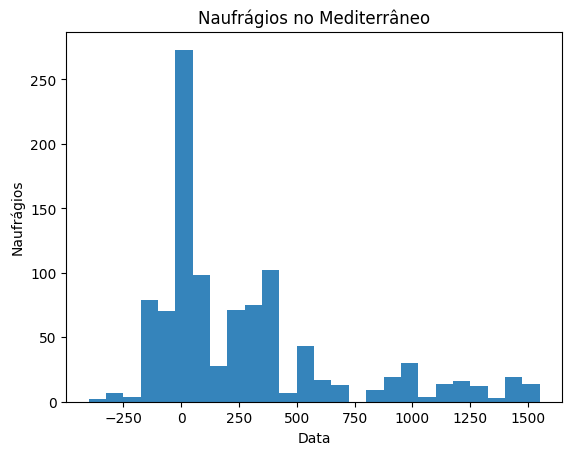

In [18]:
### Como há alta correlação entre as datas iniciais e finais (0.894), serão usadas apeanas as iniciais para essa análise ###

# Data dos naufrágios no Mediterrâneo
nauf_mediterr['Data_início'] = nauf_mediterr['Data_início'].dropna().astype(int)
plt.hist(nauf_mediterr['Data_início'], bins=range(int(min(nauf_mediterr['Data_início'])), int(max(nauf_mediterr['Data_início'])) + 10, 75),alpha=0.9)
plt.title('Naufrágios no Mediterrâneo')
plt.xlabel('Data')
plt.ylabel('Naufrágios')
plt.show()

C:\Users\loren\AppData\Local\Temp\ipykernel_17224\1014491865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nauf_no['Data_início'] = nauf_no['Data_início'].dropna().astype(int)


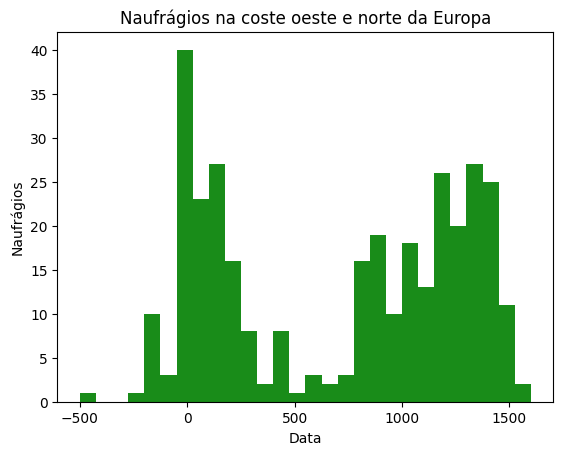

In [19]:
# Data dos naufrágios fora do mediterrâneo
nauf_no['Data_início'] = nauf_no['Data_início'].dropna().astype(int)
plt.hist(nauf_no['Data_início'], bins=range(int(min(nauf_no['Data_início'])), int(max(nauf_no['Data_início'])) + 10, 75), color='green', alpha=0.9)
plt.title('Naufrágios na coste oeste e norte da Europa')
plt.xlabel('Data')
plt.ylabel('Naufrágios')
plt.show()

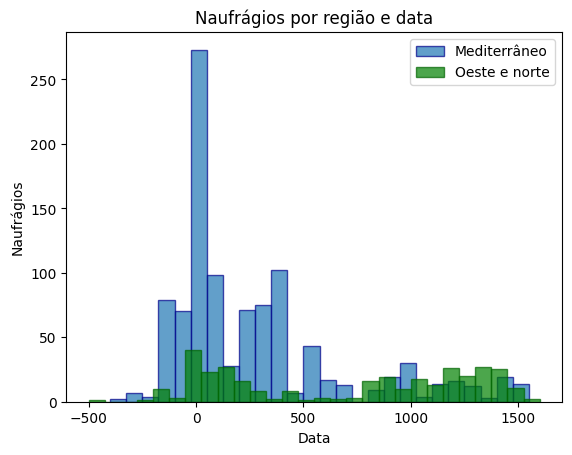

In [20]:
# Juntos
plt.hist(nauf_mediterr['Data_início'], bins=range(int(min(nauf_mediterr['Data_início'])), int(max(nauf_mediterr['Data_início'])) + 10, 75),edgecolor='darkblue', alpha=0.7, label='Mediterrâneo')
plt.hist(nauf_no['Data_início'], bins=range(int(min(nauf_no['Data_início'])), int(max(nauf_no['Data_início'])) + 10, 75), alpha=0.7, edgecolor='darkgreen', color='green',label='Oeste e norte')
plt.title('Naufrágios por região e data')
plt.xlabel('Data')
plt.ylabel('Naufrágios')
plt.legend()
plt.show()

A suposição foi coerente! De fato, a maioria dos naufrágios no Mediterrâneo ocorreu por volta do ano 0 (apesar de ainda ocorrer várias depois), relacionados ao Império Romano, enquanto os naufrágios fora do mediterrâneo estão bem distribuidos entre o ano 0, a maioria provavelmente sendo embarcações romanas, e entre o ano 1000, com embarcações nórdicas, escandinavas e inglesas. Ou seja, o Império Romano foi tão presente no norte e oeste da Europa quanto foram os nórdicos e ingleses, em suas respectivas épocas.

Mais uma pergunta, de curiosidade: quais foram os objetos mais encontrados nas embarcações naufragadas? 


<AxesSubplot: xlabel='Quantidade', ylabel='Objetos'>

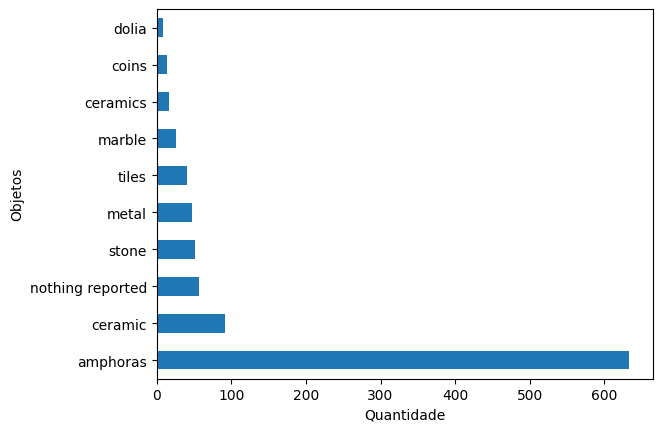

In [21]:
# Analisando as cargas mais comuns nas embarcações

#Carga 1
carga1 = data['Carga1'].str.lower().value_counts()
carga1[:10].plot(kind='barh', xlabel='Quantidade', ylabel='Objetos')

<AxesSubplot: xlabel='Quantidade', ylabel='Objetos'>

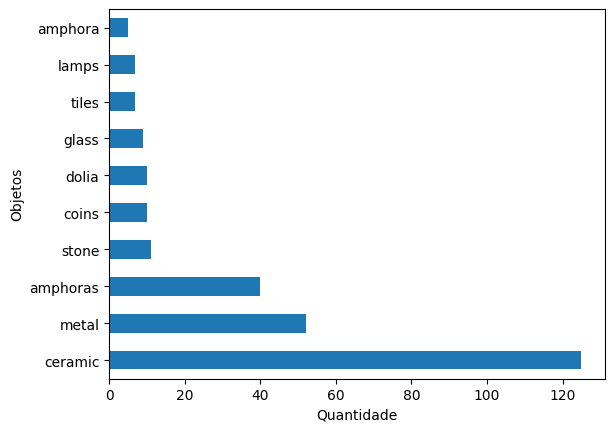

In [22]:
#Carga2
carga2 = data['Carga2'].str.lower().value_counts()
carga2[:10].plot(kind='barh', xlabel='Quantidade', ylabel='Objetos')

Apesar de muitas navegações terem uso militar, a maioria certamente tinha funções mercantis. A grande quantidade de Ânforas, vasos normalmente feitos de cerâmica ou metal (isso também explica a grande quantidade de cerâmica e metal encontrados, especialmente como 2a carga), indicam essa tendência.

Veja alguns dos itens menos comuns encontrados, normalmente relacionados à equipamento militar ou ferramentas de trabalho (ênfase em sino de igreja, cinturão canino e barril de alcatrão e cera, itens um pouco mais exóticos):

In [23]:
# Itens menos comuns dos naufrágios
print(carga1[-25:].keys())
print(carga2[-25:].keys())

Index(['chain mail', 'weapons', 'fabric', 'skeletons from crew', 'ammunition ',
       'food', 'ceramics ', 'bricks', 'oak boards', 'sculpture',
       'human remains (2 women of upper class status)', 'lime mortar ',
       'church bell', 'bronze church bell', 'animal bone', 'granite',
       'masonry', 'foodstuffs', 'roof and other tiles',
       'found a piatto(?) perhaps used for the navigation of the inner gulf of olbia',
       'column', 'no cargo found', 'stone artefact',
       'handmills, possible wreck', 'roof tiles'],
      dtype='object')
Index(['musical instruments', 'sheep wool', 'planks', 'barrels of tar and wax',
       'millstones', 'barrels', 'honey', 'tent ', 'artillery ', 'church bells',
       'dog harness', 'cylindrical african type, close to dramont f',
       'sleighs', 'foodstuffs', 'masonry', 'amphorettas', 'cookware',
       'other ceramics', 'afr', 'lead sculptures', 'tiles / tegulae',
       'artistic pieces', 'lids', 'pottery', 'whetstones'],
      dtype='o

Antes de concluir, há um ponto muito importante a se fazer. 
Na nossa análise feita aqui, usamos as informações históricas para explicar os dados. No passado, porém, foram esses dados que ajudaram, dentre outras fontes, aos historiadores a entender o decorrer dos acontecimentos! Mas o que foi mostrado aqui, de fato, corrobora com as conclusões feitas pelos historiadores.

## CONCLUSÃO

Com os dados extraídos e catagolados pelos historiadores de Harvard, salvos no DARMC - Digital Atlas of Roman and Medieval Civilizations, pudemos fazer uma restrospectiva da história da Europa nas idades Antiga e Medieval.

Foi possível perceber a grande influência do Império Romano não apenas na porção continental mas também nas águas, Dada a congruência entre a quantidade de navios encontrados, normalizados em relação às tecnologias disponíveis na época, e a história do Império, de sua expansão à decadência. Além disso, também fica claro a quantidade de embarcações com finalidades comerciais, devido à grande quantidade de Ânforas encontradas nos naufrágios.

Ainda, também verifica-se a presença dos reinos anglo-saxônicos e nórdicos no litoral norte e oeste da Europa, que foram tão ou mais presentes quanto os romanos foram em sua época - dada que a tecnologia marítima já seria maior.

Fazer esse estudo foi muito interessante para mim, pois pude relacionar meus conhecimentos em análise de dados com um assunto de meu gosto, que ao primeiro olhar parece distante ou difícil de se trabalhar, mas depois de feitos, além de revelar verdadeiras fontes historiográficas, aumentam minha percepção sobre o escopo de ideias e informações que podem ser exploradas com o que eu aprendi no curso.